In [ ]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [ ]:
#path_inception = "inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3


pre_trained_model = InceptionV3(include_top = False,
                                input_shape = (150, 150, 3),
                                weights = 'imagenet')

#pre_trained_model.load_weights(path_inception)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Print the model summary
print(pre_trained_model.summary())


87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 99.0% accuracy so cancelling training!")
            self.model.stop_training = True



In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation = 'sigmoid')(x)
model = Model(pre_trained_model.input, outputs = x)

model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 74, 74, 32)           864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 74, 74, 32)           96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 74, 74, 32)           0         ['batch_normalization_188[

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-03-27 08:49:16--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.207, 142.250.153.207, 142.250.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  37.1MB/s    in 4.5s    

2024-03-27 08:49:21 (31.9 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-03-27 08:49:38--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.207, 142.250.153.207, 142.250.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  12.7MB/s    in 0.9s    

2024-03-27 08:49:39 (12.7 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  height_shift_range = 0.2,
                                  width_shift_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  rotation_range = 0.4,
                                  shear_range = 0.1,
                                  zoom_range = 0.3,
                                  fill_mode = 'nearest'
                                  )

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale = 1/255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory('./horse-or-human/',
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary',
                                                   shuffle = True)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  val_datagen.flow_from_directory('./validation-horse-or-human/',
                                                        target_size = (150, 150),
                                                        batch_size =20,
                                                        class_mode = 'binary',
                                                        shuffle = False)



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:

callbacks = myCallback()
history = model.fit_generator(train_generator,
                              epochs = 30,
                              validation_data = validation_generator,
                              verbose = 1,
                              callbacks= [callbacks])

<ipython-input-21-453e6bc613d2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
52/52 [==============================] - 12s 236ms/step - loss: 0.1752 - acc: 0.9718 - val_loss: 0.1055 - val_acc: 0.9844
Epoch 2/30
52/52 [==============================] - 12s 236ms/step - loss: 0.1652 - acc: 0.9737 - val_loss: 3.1242e-04 - val_acc: 1.0000
Epoch 3/30
52/52 [==============================] - 12s 235ms/step - loss: 0.1474 - acc: 0.9737 - val_loss: 0.0218 - val_acc: 0.9961
Epoch 4/30
52/52 [==============================] - ETA: 0s - loss: 0.0276 - acc: 0.9951
Reached 99.0% accuracy so cancelling training!
52/52 [==============================] - 12s 236ms/step - loss: 0.0276 - acc: 0.9951 - val_loss: 0.0655 - val_acc: 0.9883


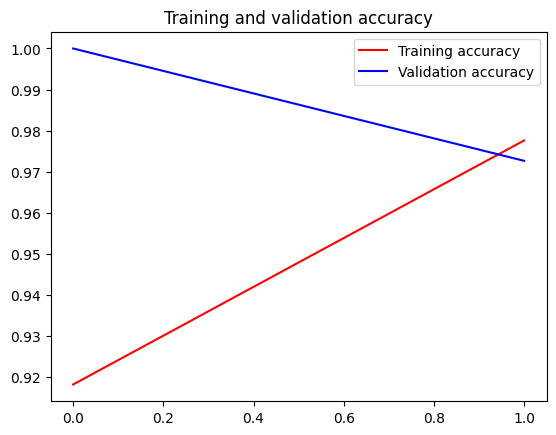

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()